<a href="https://colab.research.google.com/github/mineptune/Text_Toxicity_Moderation/blob/main/Text_Toxicity_Moderation_Model_With_Gradio_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Text Toxicity Moderation Model

**Author:** Neptune Michel

**Environment:** Jupyter Notebook  

**Objective:** Detect whether a piece of text is toxic or non-toxic using NLP techniques.


## 🧭 1. Introduction
### Objective
The goal of this notebook is to develop a model that can automatically identify toxic comments — such as hate speech, insults, or harassment — using natural language processing (NLP).

### Why It Matters
Text toxicity detection is critical for moderating online platforms, maintaining community standards, and reducing online abuse.

### Approach
We'll explore two approaches:
1. **Baseline Model:** TF-IDF + Logistic Regression  
2. **Advanced Model:** Pre-trained BERT (Hugging Face)


In [1]:
# ⚙️ Setup and Imports
!pip install pandas numpy scikit-learn matplotlib seaborn transformers torch gradio SpeechRecognition --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 22.0 MB/s eta 0:00:00


In [2]:
# 📥 Load the Dataset
data = {
    'text': [
        "I love this product!",
        "You are such an idiot.",
        "What a wonderful day.",
        "This is the worst thing ever.",
        "I hate you so much.",
        "Great job on the project!"
    ],
    'label': [0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)
df.head()


,text,label
0,I love this product!,0
1,You are such an idiot.,1
2,What a wonderful day.,0
3,This is the worst thing ever.,1
4,I hate you so much.,1


label
0    3
1    3
Name: count, dtype: int64


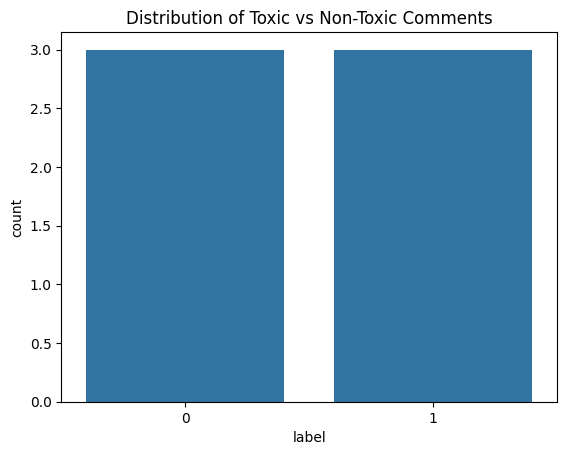

In [3]:
# 🔍 Exploratory Data Analysis (EDA)
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Distribution of Toxic vs Non-Toxic Comments")
plt.show()


In [4]:
# 🧹 Data Preprocessing
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,text,label,clean_text
0,I love this product!,0,i love this product
1,You are such an idiot.,1,you are such an idiot
2,What a wonderful day.,0,what a wonderful day
3,This is the worst thing ever.,1,this is the worst thing ever
4,I hate you so much.,1,i hate you so much


In [5]:
# 🧩 Baseline Model – TF-IDF + Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from google.colab import userdata
import os

# Retrieve the secret
hf_token = userdata.get('HF_TOKEN')

# Set it as environment variable for Hugging Face
os.environ['HF_TOKEN'] = hf_token

from huggingface_hub import login
login(token=hf_token)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [9]:
# 🤖 Advanced Model – Pre-trained BERT (Hugging Face)
from transformers import pipeline

toxic_model = pipeline("text-classification", model="unitary/toxic-bert")

examples = [
    "I hate this product so much!",
    "You're amazing and kind.",
    "Go die in a hole."
]
for e in examples:
    print(e, "→", toxic_model(e))


Device set to use cpu


I hate this product so much! → [{'label': 'toxic', 'score': 0.47330233454704285}]
You're amazing and kind. → [{'label': 'toxic', 'score': 0.0007151445024646819}]
Go die in a hole. → [{'label': 'toxic', 'score': 0.9627431035041809}]


In [11]:
# 📊 Model Evaluation and Examples
def predict_toxicity(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return "Toxic" if pred == 1 else "Non-Toxic"

sample_texts = [
    "I can't stand you.",
    "You're doing great work.",
    "This app sucks."
]

for t in sample_texts:
    print(f"{t} → {predict_toxicity(t)}")


I can't stand you. → Toxic
You're doing great work. → Non-Toxic
This app sucks. → Toxic


## 💡 Conclusion & Future Work
### Results Summary
- Logistic Regression (TF-IDF) achieved decent baseline performance.
- BERT-based model (pretrained) delivers higher contextual accuracy.

### Future Improvements
- Fine-tune BERT on a custom dataset.
- Add explainability (e.g., SHAP values).
- Integrate into an API for real-time moderation.

### Ethical Considerations
- Ensure fairness: avoid bias against dialects, slang, or specific groups.
- Consider privacy, transparency, and accountability.


In [13]:
# 🎙️ Interactive Gradio Interface (Text + Voice)
import gradio as gr
from transformers import pipeline
import speech_recognition as sr

# Load pre-trained model
toxic_model = pipeline("text-classification", model="unitary/toxic-bert")

def classify_toxicity(text, audio=None):
    # If audio provided, use speech recognition to extract text
    if audio is not None:
        try:
            recognizer = sr.Recognizer()
            with sr.AudioFile(audio) as source:
                audio_data = recognizer.record(source)
                text_from_audio = recognizer.recognize_google(audio_data)
                text = text_from_audio
        except Exception as e:
            return f"⚠️ Error recognizing speech: {e}"
    if not text or text.strip() == "":
        return "⚠️ Please enter or speak a sentence."
    result = toxic_model(text)[0]
    label = result['label']
    score = round(result['score'], 3)
    return f"🧾 Input: {text}\n\nPrediction: {label}\nConfidence: {score}"

# Launch Gradio Interface
interface = gr.Interface(
    fn=classify_toxicity,
    inputs=[
        gr.Textbox(label="Type a sentence here"),
        gr.Audio(sources="microphone", type="filepath", label="🎤 Or speak your sentence (speech-to-text)")
    ],
    outputs="text",
    title="🧠 Real-Time Text Toxicity Detector",
    description="Type or speak a sentence and see if it's toxic using a fine-tuned NLP model.",
    allow_flagging="never"
)

interface.launch()


Device set to use cpu
/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://42927523427ea9de2d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
